# Модель для прогназирования цен на арматуру

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
! gdown --id 1BV8yJleQDd4SxMbr1OsJbTiSd-wGeL8h

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BV8yJleQDd4SxMbr1OsJbTiSd-wGeL8h
To: /content/train.xlsx
100% 10.6k/10.6k [00:00<00:00, 17.5MB/s]


In [4]:
! gdown --id 19QUCknVnLA65oUAibD9K9wdgbi2x-D1L

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19QUCknVnLA65oUAibD9K9wdgbi2x-D1L
To: /content/test.xlsx
100% 5.40k/5.40k [00:00<00:00, 16.7MB/s]


In [5]:
df = pd.read_excel('train.xlsx', sheet_name='Sheet1')

# Конвертация в csv
df.to_csv('train.csv', index=False)

In [6]:
df_test = pd.read_excel('test.xlsx', sheet_name='Sheet1')

# Конвертация в csv
df_test.to_csv('test.csv', index=False)

In [7]:
df.head()

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


# Проверка данных

данные без пропусков

<Axes: >

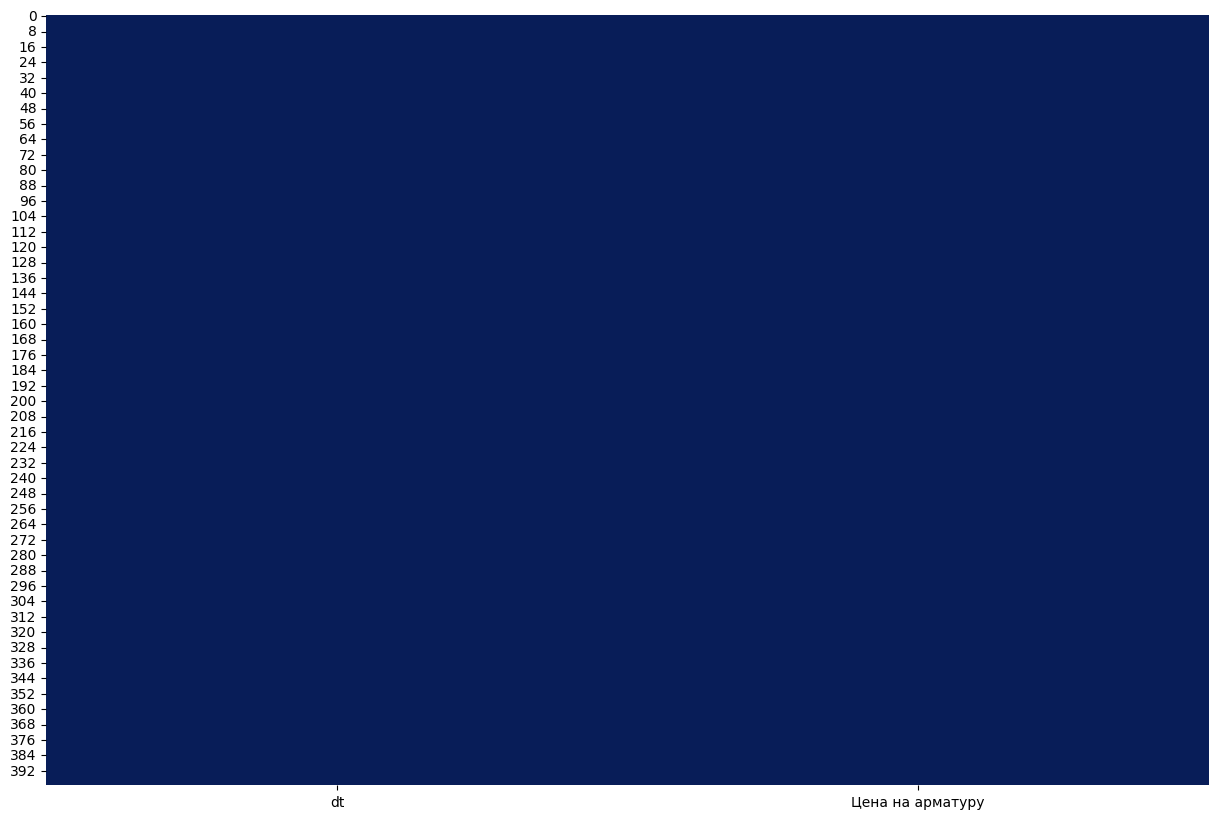

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


все данные в порядке и преведенны к числовым данным

# Модель

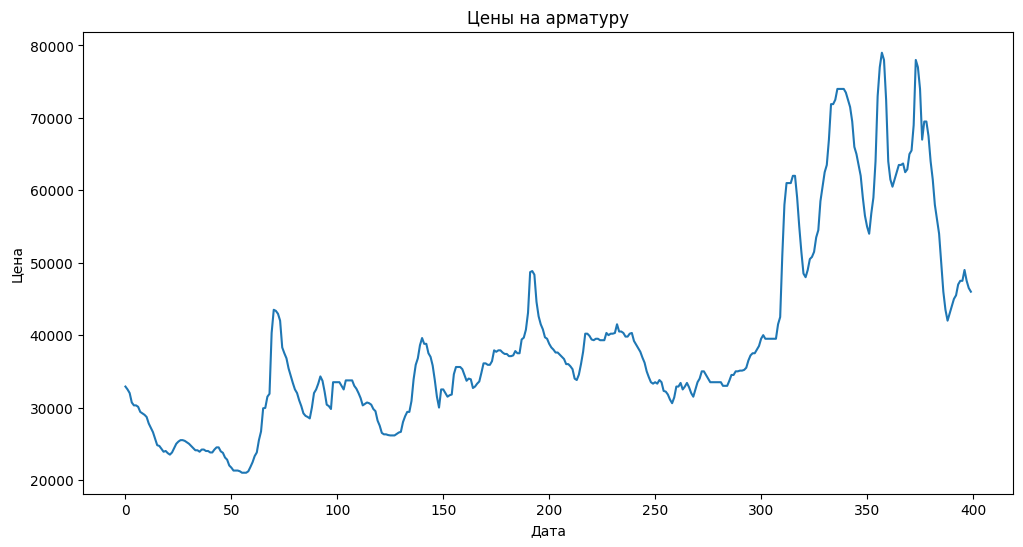

In [10]:
#График временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df['Цена на арматуру'])
plt.title('Цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

### По графику временного ряда можно понять что:
### 1. Есть тренд (резкое увеличение и снижение цен).
### 2. Сезонность возможная, потому что видны опеределенные скачки через +- похожее время.
### 3. Данные с большой вероятностью нестационарны, поскольку есть тренд и возможна сезонность.

In [11]:
from statsmodels.tsa.stattools import adfuller

# Выполнение теста Дики-Фуллера
result = adfuller(df['Цена на арматуру'])

# Вывод результатов
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values:
   1%: -3.4470566389664703
   5%: -2.8689037160476016
   10%: -2.570692663557422


ADF Statistic: Это тестовая статистика. Чем больше отрицательное значение, тем больше вероятность, что ряд стационарен.

p-value: Если p-value меньше уровня значимости (обычно 0.05), то ряд стационарен.

Critical Values: Критические значения для разных уровней значимости (1%, 5%, 10%). Если ADF Statistic меньше критического значения, ряд стационарен.

Благодаря этому тесту мы поняли, что наш временный ряд нестанционарен, то есть изменяются со временем.

### Обучение модели

Модель я выбрал SARIMA так как она больше всего подходит для моего временного ряда так как в ней есть сезонность, а эта модель может её учитывать

In [12]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.5 MB/s eta 0:00:00


In [13]:
!pip install --upgrade numpy pandas statsmodels pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 88.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requ

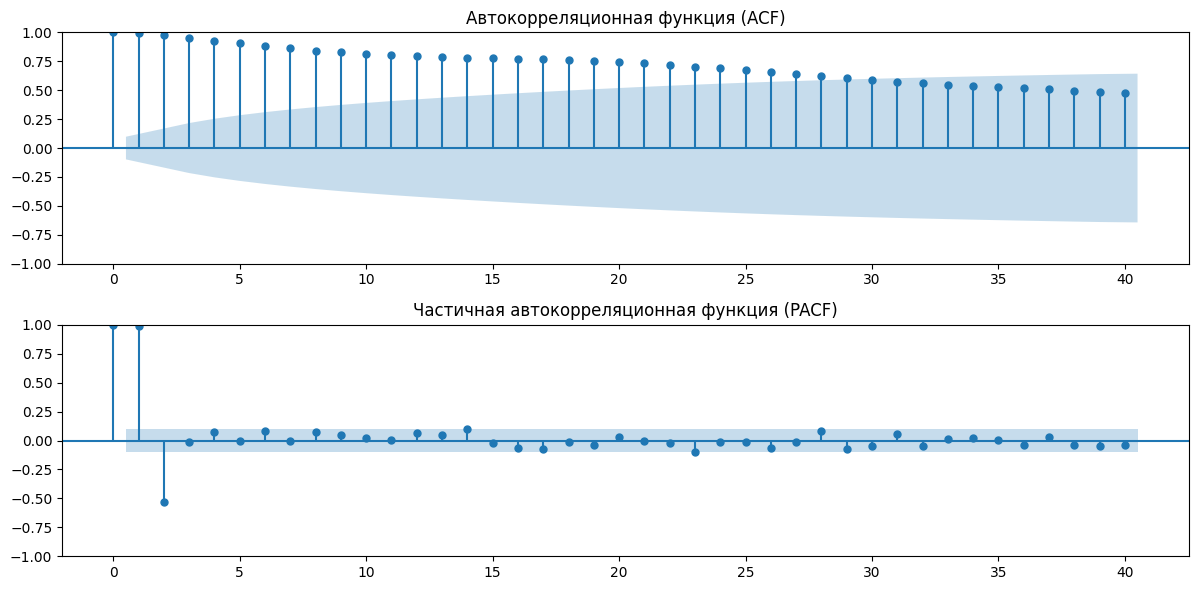

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Построение ACF и PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(2, 1, 1)
plot_acf(df['Цена на арматуру'].dropna(), lags=40, ax=plt.gca())
plt.title('Автокорреляционная функция (ACF)')

# PACF
plt.subplot(2, 1, 2)
plot_pacf(df['Цена на арматуру'].dropna(), lags=40, ax=plt.gca())
plt.title('Частичная автокорреляционная функция (PACF)')

plt.tight_layout()
plt.show()

In [15]:
# Сезонное дифференцирование (например, для месячных данных)
df['Цена_seasonal_diff'] = df['Цена на арматуру'].diff(12).dropna()

# Проверка стационарности после сезонного дифференцирования
result_seasonal = adfuller(df['Цена_seasonal_diff'].dropna())
print('ADF Statistic после сезонного дифференцирования:', result_seasonal[0])
print('p-value после сезонного дифференцирования:', result_seasonal[1])

ADF Statistic после сезонного дифференцирования: -3.366441302851235
p-value после сезонного дифференцирования: 0.012157489529020784


Сезонное дифференцирование помогла сделать данные станционарными

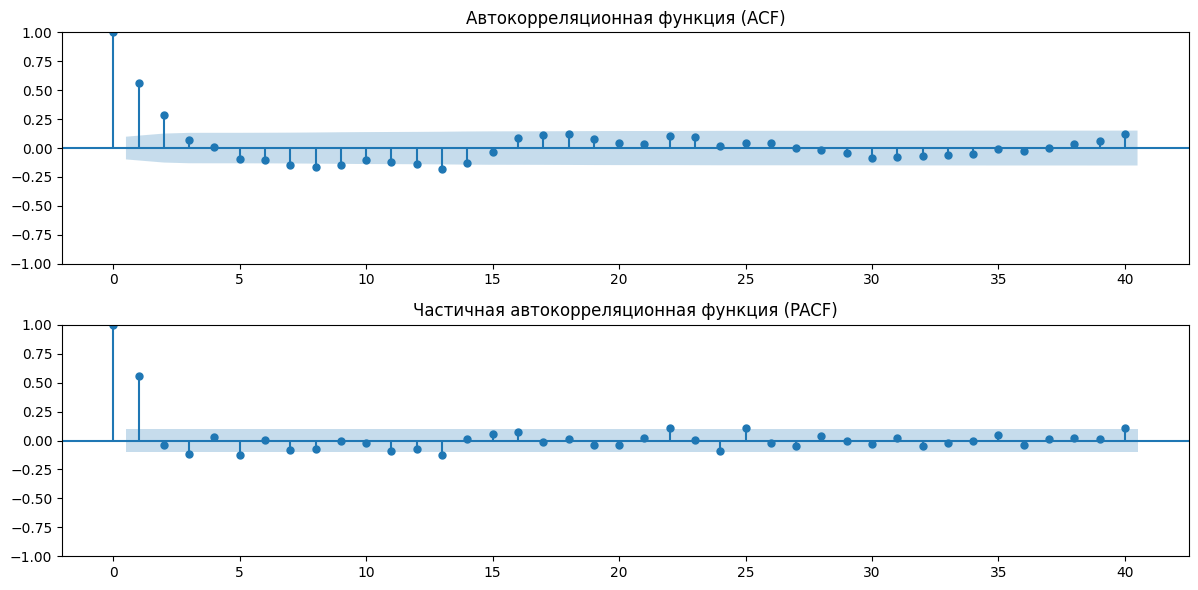

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['Цена_diff'] = df['Цена на арматуру'].diff().dropna()

# Построение ACF и PACF для несезонно продифференцированного ряда
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(2, 1, 1)
plot_acf(df['Цена_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Автокорреляционная функция (ACF)')

# PACF
plt.subplot(2, 1, 2)
plot_pacf(df['Цена_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Частичная автокорреляционная функция (PACF)')

plt.tight_layout()
plt.show()

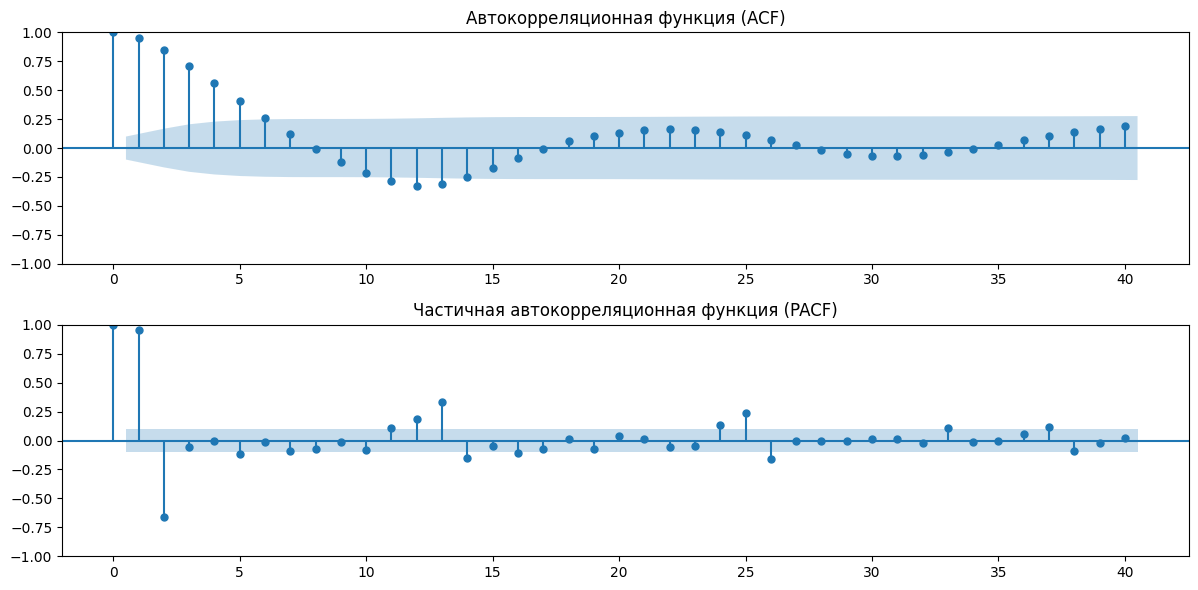

In [17]:
# Построение ACF и PACF для сезонно продифференцированного ряда
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(2, 1, 1)
plot_acf(df['Цена_seasonal_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Автокорреляционная функция (ACF)')

# PACF
plt.subplot(2, 1, 2)
plot_pacf(df['Цена_seasonal_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Частичная автокорреляционная функция (PACF)')

plt.tight_layout()
plt.show()

p = 4, q = 8, d = 1. S = 7, D = 1, P = 3, Q = 12

In [19]:
# from statsmodels.tsa.arima.model import ARIMA

# # Параметры ARIMA
# order = (4, 1, 8)  # (p, d, q)

# # Обучение модели
# model = ARIMA(df['Цена на арматуру'], order=order)
# model_fit = model.fit()

# # Вывод результатов
# print(model_fit.summary())

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Параметры ARIMA и SARIMA
order = (4, 1, 8)  # (p, d, q)
seasonal_order = (3, 1, 12, 12)  # (P, D, Q, S)

# Обучение модели SARIMA
model = SARIMAX(df['Цена на арматуру'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Вывод результатов
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                        SARIMAX Results                                                         
Dep. Variable:                                                         Цена на арматуру   No. Observations:                  400
Model:             SARIMAX(4, 1, 8)x(3, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood               -3432.444
Date:                                                                  Thu, 20 Mar 2025   AIC                           6920.889
Time:                                                                          06:53:13   BIC                           7031.724
Sample:                                                                               0   HQIC                          6964.838
                                                                                  - 400                                         
Covariance Type:                                                                    opg          

In [20]:
# Прогноз на 12 шагов вперед
forecast = model_fit.forecast(steps=12)
print(forecast)

400    45701.591306
401    45549.885080
402    44864.111411
403    44178.060807
404    43053.415681
405    42663.410070
406    42592.162692
407    42052.163549
408    42081.689727
409    41775.210847
410    41155.788029
411    41162.957067
Name: predicted_mean, dtype: float64


In [21]:
# Прогнозирование на тестовых данных
predictions = model_fit.forecast(steps=len(df_test))

# Добавление прогнозов в тестовые данные для удобства
df_test['Прогноз'] = predictions
print(df_test.head())

          dt  Цена на арматуру  Прогноз
0 2022-09-05             46000      NaN
1 2022-09-12             46000      NaN
2 2022-09-19             46000      NaN
3 2022-09-26             45500      NaN
4 2022-10-03             45500      NaN


### Оценка качетсва модели

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка качества
mae = mean_absolute_error(df_test['Цена на арматуру'], predictions)
rmse = mean_squared_error(df_test['Цена на арматуру'], predictions) #squared=False)
mape = (abs(df_test['Цена на арматуру'] - predictions) / df_test['Цена на арматуру']).mean() * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

MAE: 2557.3741084912767
RMSE: 14153587.128877196
MAPE: nan%


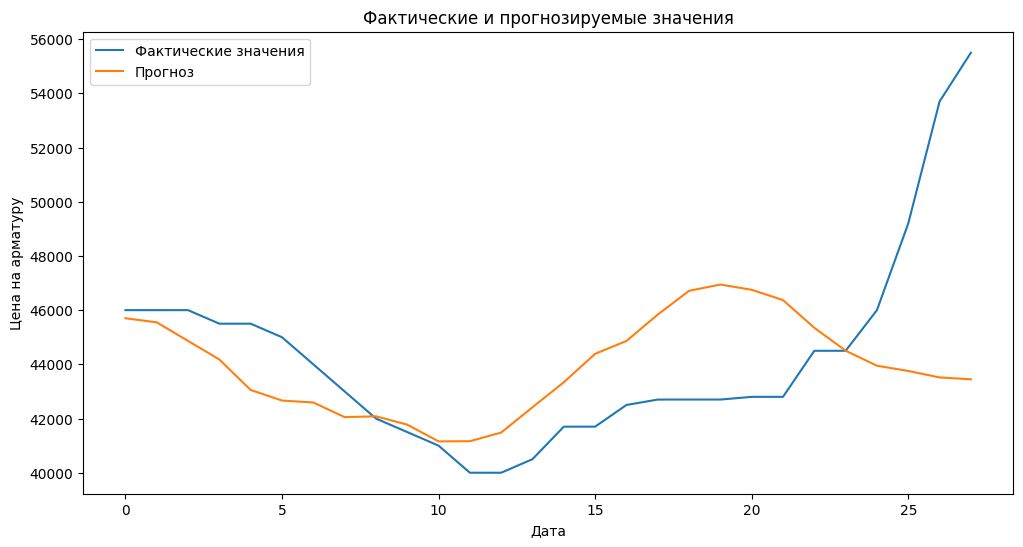

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Цена на арматуру'], label='Фактические значения')
plt.plot(df_test.index, predictions, label='Прогноз')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.show()